# Table of Contents
* [Comparing TAD borders between experiments](#Comparing-TAD-borders-between-experiments)
	* [Alignment of TAD borders](#Alignment-of-TAD-borders)
	* [Significance](#Significance)
	* [Playing with borders](#Playing-with-borders)
		* [Get a given column](#Get-a-given-column)
		* [Search for aligned TADs with specific features](#Search-for-aligned-TADs-with-specific-features)
			* [Strongly conserved broders](#Strongly-conserved-broders)
			* [Borders specific to one experiment](#Borders-specific-to-one-experiment)


# Comparing TAD borders between experiments

In [1]:
from pytadbit import load_chromosome

We load Chromosome objects, previously saved. These object usualy only contain "metadata", chromosome size, position of TADs for each experiment.

_Note: the interaction matrices associated o the experiment can , also be saved, but by default, they are not as they can be loaded afterwards directly from the matrix._

In [2]:
crm = load_chromosome('results/fragment/crm18.tdb')

In [3]:
print crm

Chromosome 18:
   2  experiments loaded: T0, T60
   0  alignment loaded: 
   species         : UNKNOWN
   assembly version: UNKNOWN



## Alignment of TAD borders

In [5]:
ali = crm.align_experiments(['T0', 'T60'])

/home/fransua/.miniconda2/lib/python2.7/site-packages/pytadbit/utils/extraviews.py:797: UserWarning: WARNING: raw Hi-C data not available, TAD's height fixed to 1
  "TAD's height fixed to 1")


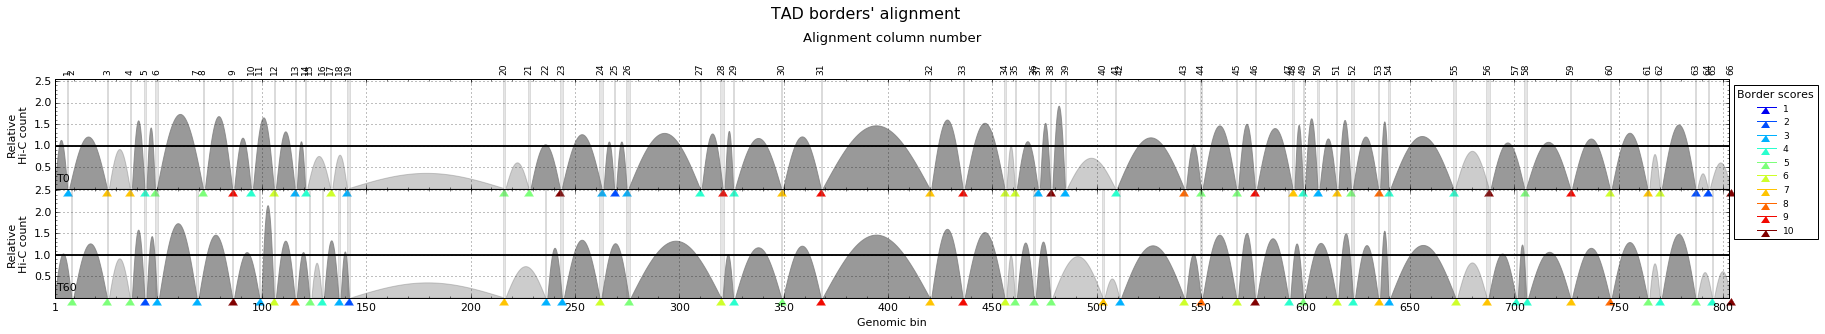

In [6]:
ali.draw()

## Significance

In [9]:
ali, stats = crm.align_experiments(['T0', 'T60'], randomize=True)

In [10]:
print ali

Alignment shown in 100 Kb (2 experiments) (scores: 0 1 2 3 4 5 6 7 8 9 10)
 T0:|     7| ---- |    26|    37|    44|    49| ---- |    72|    86|    95| ---- |   106|   116|   121| ---- | ---- |   133| ---- |   141|   216|   228| ---- |   243|   263|   269|   275|   310|   321|   326|   349|   368|   420|   436|   456|   461| ---- |   472|   478|   485| ---- |   509| ---- |   542|   550|   567|   576| ---- |   594|   599|   606|   615|   622|   635|   640|   671|   688| ---- |   705|   727|   746|   764|   770|   787|   793| ---- |   804
T60:| ---- |     9|    26|    37|    44|    50|    69| ---- |    86| ---- |    99|   106|   116| ---- |   123|   129| ---- |   137|   142|   216| ---- |   236|   244|   262| ---- |   276| ---- |   320|   326|   349|   368|   420|   436|   456|   461|   470| ---- |   478| ---- |   503| ---- |   511|   542|   550|   567|   576|   592| ---- |   599| ---- |   615|   623|   635|   640|   672|   687|   701|   706|   727|   746|   764|   770|   787| ---- |   79

In [11]:
stats

(0.5151515151515151, 0.0, 0.8301886792452831, 0.8269230769230769)

In [13]:
print 'Alignment score: %.3f, p-value: %.4f\n  proportion of borders of T0 found in T60: %.3f, of T60 in T0 %.3f' % stats

Alignment score: 0.515, p-value: 0.0000
  proportion of borders of T0 found in T60: 0.830, of T60 in T0 0.827


## Playing with borders

### Get a given column

In [14]:
ali.get_column(3)

[(2, [>2500<, >2500<])]

In [23]:
cols = ali.get_column(3)

In [26]:
col = cols[0]

In [27]:
border1, border2 = col[1]

In [30]:
border1['score']

7.0

In [31]:
border2['score']

5.0

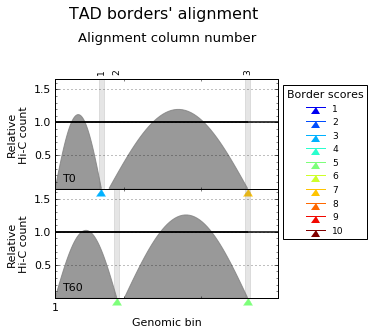

In [35]:
ali.draw(focus=(1, 30))

### Search for aligned TADs with specific features

#### Strongly conserved broders

In [36]:
ali.get_column(lambda x: x['score']>5, min_num=2)

[(8, [>8500<, >8500<]),
 (11, [>10500<, >10500<]),
 (27, [>32000<, >31900<]),
 (30, [>36700<, >36700<]),
 (31, [>41900<, >41900<]),
 (32, [>43500<, >43500<]),
 (33, [>45500<, >45500<]),
 (42, [>54100<, >54100<]),
 (45, [>57500<, >57500<]),
 (50, [>61400<, >61400<]),
 (52, [>63400<, >63400<]),
 (55, [>68700<, >68600<]),
 (58, [>72600<, >72600<]),
 (59, [>74500<, >74500<]),
 (65, [>80300<, >80300<])]

#### Borders specific to one experiment 

In [47]:
ali.get_column(lambda x: x['score']==0.0, lambda x: x['exp'].name=='T0', min_num=1)

[(1, [>-<, >800<]),
 (6, [>-<, >6800<]),
 (10, [>-<, >9800<]),
 (14, [>-<, >12200<]),
 (15, [>-<, >12800<]),
 (17, [>-<, >13600<]),
 (21, [>-<, >23500<]),
 (35, [>-<, >46900<]),
 (39, [>-<, >50200<]),
 (41, [>-<, >51000<]),
 (46, [>-<, >59100<]),
 (56, [>-<, >70000<]),
 (64, [>-<, >79400<])]